In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
here = Path.cwd()
root = next(p for p in [here, *here.parents] if (p / "data" / "processed").exists())

#creating 2 columns to identify source file and if ios or android
df_v2 = pd.read_csv(root / "data" / "processed" / "merged" / "state1_clean.csv", header=0)
df_v2.head()

,is_ios,source_file,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,memsMedianHorizontalNorm,gyro_angular_change_per_second,gyroAngleChange,mems_radius
0,0,android_turns.csv,5.0,12.743101,3.173500,0.007654,1,15.306123,10.714942,13.421639,3.099853,17.929585,57.610783,23.959110
1,0,android_turns.csv,5.0,11.281634,2.737719,0.008573,1,19.387754,9.529365,10.491248,1.173136,11.777087,32.709633,9.324203
2,0,android_turns.csv,5.0,11.028114,3.967555,0.009012,1,16.836735,8.478003,14.696693,2.366215,22.094933,88.539480,3.087557
3,0,android_turns.csv,4.0,19.864027,5.356430,0.025984,1,20.663265,22.033857,18.588970,2.522688,16.592813,89.536600,12.669695
4,0,android_turns.csv,5.0,16.620464,5.078434,0.019170,1,19.387754,19.640330,18.141582,2.252747,18.612541,95.261020,10.121602


In [3]:
df_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6944 entries, 0 to 6943
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_ios                          6944 non-null   int64  
 1   source_file                     6944 non-null   object 
 2   eventType                       6944 non-null   float64
 3   eventSampleSpeed                6944 non-null   float64
 4   eventDurationSeconds            6944 non-null   float64
 5   eventMilesDriven                6944 non-null   float64
 6   eventSensorDetectionMthd        6944 non-null   int64  
 7   eventGPSSignalStrength          6944 non-null   float64
 8   eventStartSpeed                 6944 non-null   float64
 9   eventEndSpeed                   6944 non-null   float64
 10  memsMedianHorizontalNorm        6944 non-null   float64
 11  gyro_angular_change_per_second  6944 non-null   float64
 12  gyroAngleChange                 69

In [4]:
df_v2.drop(columns=['source_file'], inplace=True)

In [5]:
scaler =StandardScaler()

features =scaler.fit(df_v2)
features =features.transform(df_v2)

# Convert to pandas Dataframe
scaled_df =pd.DataFrame(features,columns=df_v2.columns)
# Print the scaled data
scaled_df.head(2)
X = scaled_df.values

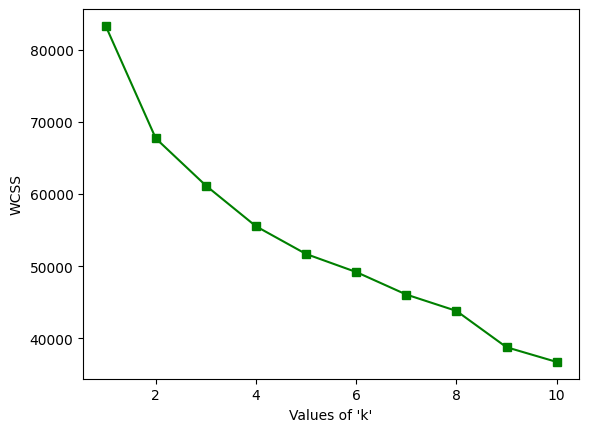

In [6]:
wcss = {} 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss[i] = kmeans.inertia_
    
plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel("Values of 'k'")
plt.ylabel('WCSS')
plt.show()

In [7]:
silhouette_scores = {}
for k in range(1, 11):
    kmeans_model = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels_k = kmeans_model.fit_predict(X)
    if k == 1:
        silhouette_scores[k] = None  # Silhouette score is not defined for k=1
    else:
        silhouette_scores[k] = silhouette_score(X, labels_k)

for k, score in silhouette_scores.items():
    print(f"k={k}: Silhouette Score = {score:.4f}" if score is not None else f"k={k}: Silhouette Score = N/A")

NameError: name 'silhouette_score' is not defined

In [ ]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(X)
df_v2['cluster'] = kmeans.fit_predict(X)

In [ ]:
kmeans.cluster_centers_

In [ ]:
pca=PCA(n_components=2)

reduced_X=pd.DataFrame(data=pca.fit_transform(X),columns=['PCA1','PCA2'])

#Reduced Features
reduced_X.head()

In [ ]:
centers=pca.transform(kmeans.cluster_centers_)

# reduced centers
centers

In [ ]:
plt.figure(figsize=(7,5))

# Scatter plot
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Turn Cluster')
plt.tight_layout()

In [ ]:
df_v2.groupby('cluster').mean(numeric_only=True).T

In [ ]:
kmeans=KMeans(n_clusters=7)
kmeans.fit(X)

plt.figure(figsize=(7,5))

# Scatter plot
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Turn Cluster')
plt.tight_layout()

In [ ]:
df_v2.groupby('cluster').mean(numeric_only=True).T